In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('House Prediction Data Set.csv')
df.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


### 📌 Boston Housing Dataset – Column Descriptions 

This dataset is a variant of the Boston Housing Dataset, a well-known dataset used in regression and machine learning.
It was originally collected by the U.S. Census Service and later published in the book “Hedonic prices and the demand for clean air” by Harrison and Rubinfeld (1978).

The dataset contains information about houses in the Boston area, along with neighborhood, environmental, and economic attributes. The goal is to predict the median house value (MEDV) based on these features.

| Column (Short) | Renamed (Meaningful) | Description |
|----------------|-----------------------|-------------|
| **CRIM**       | CrimeRate             | Per capita crime rate by town |
| **ZN**         | ResLandZone           | Proportion of residential land zoned for lots over 25,000 sq. ft. |
| **INDUS**      | IndusProp             | Proportion of non-retail business acres per town |
| **CHAS**       | RiverDummy            | Charles River dummy variable (1 if tract bounds river, 0 otherwise) |
| **NOX**        | PollutionNOX          | Nitric oxides concentration (parts per 10 million) |
| **RM**         | AvgRooms              | Average number of rooms per dwelling |
| **AGE**        | OldHousePerc          | Proportion of owner-occupied units built before 1940 |
| **DIS**        | DistEmploy            | Weighted distances to five Boston employment centers |
| **RAD**        | HighwayAccess         | Index of accessibility to radial highways |
| **TAX**        | PropertyTax           | Full-value property tax rate per $10,000 |
| **PTRATIO**    | PupilTeacher          | Pupil–teacher ratio by town |
| **B**          | BlackProp             | 1000(Bk – 0.63)², where Bk is the proportion of Black residents |
| **LSTAT**      | LowStatusPerc         | % lower status of the population |
| **MEDV**       | HouseValue            | Median value of owner-occupied homes in $1000’s (**Target**) |

---

📖 **Sources**:  
- U.S. Census Service  
- Harrison, D. & Rubinfeld, D.L. (1978). *Hedonic housing prices and the demand for clean air.*  
- Scikit-learn Documentation (Boston Housing Dataset, now deprecated)  
- Kaggle – *Boston House Prices Dataset*  


In [3]:
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", 
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

df = pd.read_csv("house Prediction Data Set.csv", delim_whitespace=True, names=columns)

print(df.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.rename(columns={
    "CRIM": "CrimeRate",
    "ZN": "ResLandZone",
    "INDUS": "IndusProp",
    "CHAS": "RiverDummy",
    "NOX": "PollutionNOX",
    "RM": "AvgRooms",
    "AGE": "OldHousePerc",
    "DIS": "DistEmploy",
    "RAD": "HighwayAccess",
    "TAX": "PropertyTax",
    "PTRATIO": "PupilTeacher",
    "B": "BlackProp",
    "LSTAT": "LowStatusPerc",
    "MEDV": "HouseValue"
}, inplace=True)

In [6]:
df.head()

,CrimeRate,ResLandZone,IndusProp,RiverDummy,PollutionNOX,AvgRooms,OldHousePerc,DistEmploy,HighwayAccess,PropertyTax,PupilTeacher,BlackProp,LowStatusPerc,HouseValue
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
df.tail()

,CrimeRate,ResLandZone,IndusProp,RiverDummy,PollutionNOX,AvgRooms,OldHousePerc,DistEmploy,HighwayAccess,PropertyTax,PupilTeacher,BlackProp,LowStatusPerc,HouseValue
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [11]:
df.shape

(506, 14)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CrimeRate      506 non-null    float64
 1   ResLandZone    506 non-null    float64
 2   IndusProp      506 non-null    float64
 3   RiverDummy     506 non-null    int64  
 4   PollutionNOX   506 non-null    float64
 5   AvgRooms       506 non-null    float64
 6   OldHousePerc   506 non-null    float64
 7   DistEmploy     506 non-null    float64
 8   HighwayAccess  506 non-null    int64  
 9   PropertyTax    506 non-null    float64
 10  PupilTeacher   506 non-null    float64
 11  BlackProp      506 non-null    float64
 12  LowStatusPerc  506 non-null    float64
 13  HouseValue     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CrimeRate,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ResLandZone,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
IndusProp,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
RiverDummy,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
PollutionNOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
AvgRooms,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
OldHousePerc,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DistEmploy,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
HighwayAccess,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
PropertyTax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [14]:
df.isnull().sum()

CrimeRate        0
ResLandZone      0
IndusProp        0
RiverDummy       0
PollutionNOX     0
AvgRooms         0
OldHousePerc     0
DistEmploy       0
HighwayAccess    0
PropertyTax      0
PupilTeacher     0
BlackProp        0
LowStatusPerc    0
HouseValue       0
dtype: int64

In [15]:
df.duplicated().sum()

0

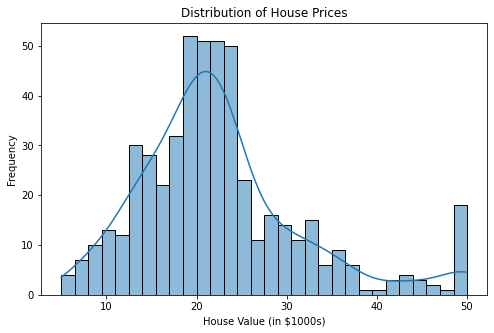

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df['HouseValue'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('House Value (in $1000s)')
plt.ylabel('Frequency')
plt.show()

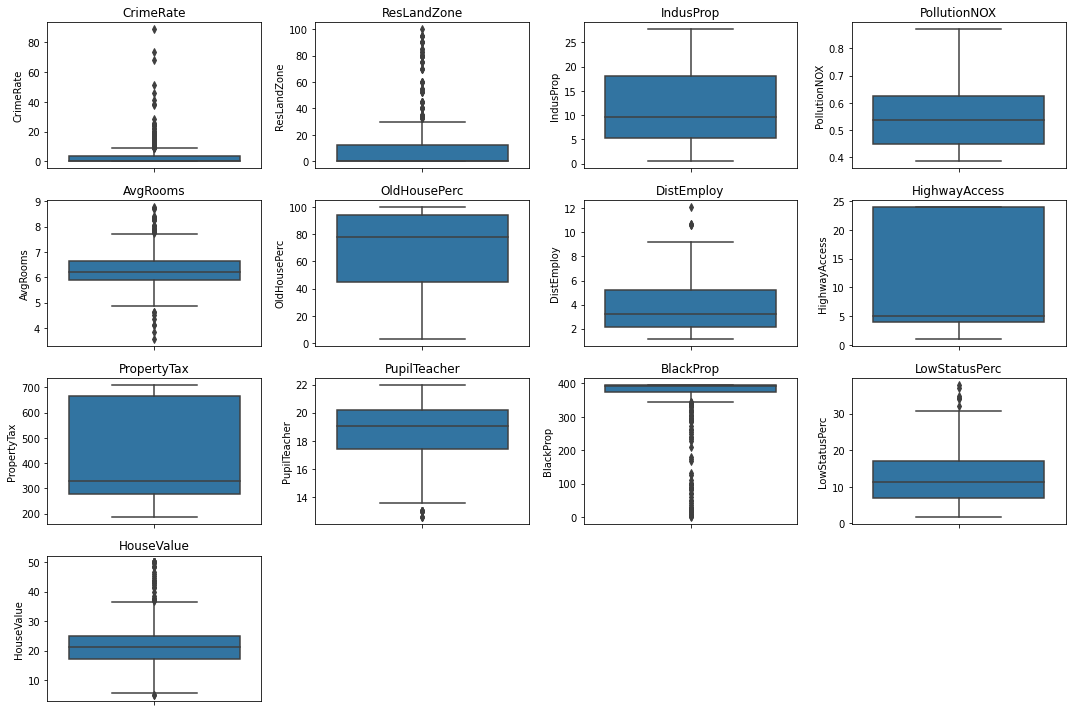

In [22]:
numeric_cols = ['CrimeRate','ResLandZone','IndusProp','PollutionNOX','AvgRooms',
                'OldHousePerc','DistEmploy','HighwayAccess','PropertyTax',
                'PupilTeacher','BlackProp','LowStatusPerc','HouseValue']

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [23]:
outlier_cols = ['CrimeRate','ResLandZone','AvgRooms','DistEmploy',
                'PupilTeacher','BlackProp','LowStatusPerc','HouseValue']

for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df[col] = np.where(df[col] > upper, upper, df[col])
    df[col] = np.where(df[col] < lower, lower, df[col])

In [24]:
X = df.drop('HouseValue', axis=1)
y = df['HouseValue']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [26]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = lr_model.predict(X_test)

In [28]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

MSE: 11.715255850765017
RMSE: 3.422755593197536
R² Score: 0.7605463910303044


In [29]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

feature_importance

,Feature,Coefficient
4,PollutionNOX,-12.371855
5,AvgRooms,3.425960
3,RiverDummy,1.551423
7,DistEmploy,-1.130980
10,PupilTeacher,-0.799287
0,CrimeRate,-0.621386
12,LowStatusPerc,-0.448925
8,HighwayAccess,0.295042
1,ResLandZone,0.030118
11,BlackProp,0.018457


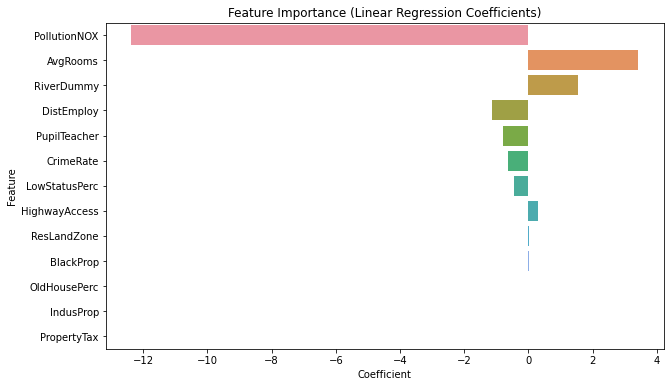

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.show()

In [32]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=100,   
    random_state=42
)

rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [33]:
y_pred_rf = rf_model.predict(X_test)

In [34]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MSE (RF): {mse_rf}")
print(f"RMSE (RF): {rmse_rf}")
print(f"R² Score (RF): {r2_rf}")

MSE (RF): 5.972754873314949
RMSE (RF): 2.443922026848432
R² Score (RF): 0.8779200618300446


In [35]:
feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feat_imp

,Feature,Importance
12,LowStatusPerc,0.541594
5,AvgRooms,0.288209
0,CrimeRate,0.039150
7,DistEmploy,0.032404
4,PollutionNOX,0.021430
9,PropertyTax,0.020581
10,PupilTeacher,0.017362
6,OldHousePerc,0.015873
11,BlackProp,0.009515
2,IndusProp,0.007489


In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [39]:
rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,               
    n_jobs=-1,          
    scoring='r2',       
    verbose=2
)

In [40]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [41]:
print("Best Parameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_

y_pred_best = best_rf.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"MSE: {mse_best}")
print(f"RMSE: {rmse_best}")
print(f"R² Score: {r2_best}")


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
MSE: 6.0353937134735824
RMSE: 2.456703831045489
R² Score: 0.8766397571974589


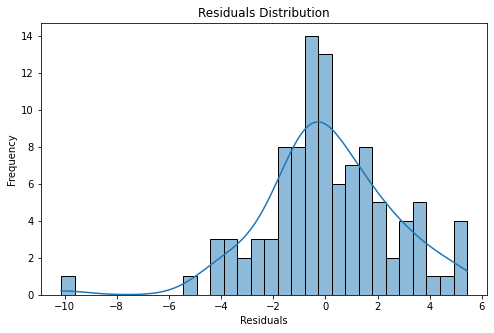

In [42]:
residuals = y_test - y_pred_best
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

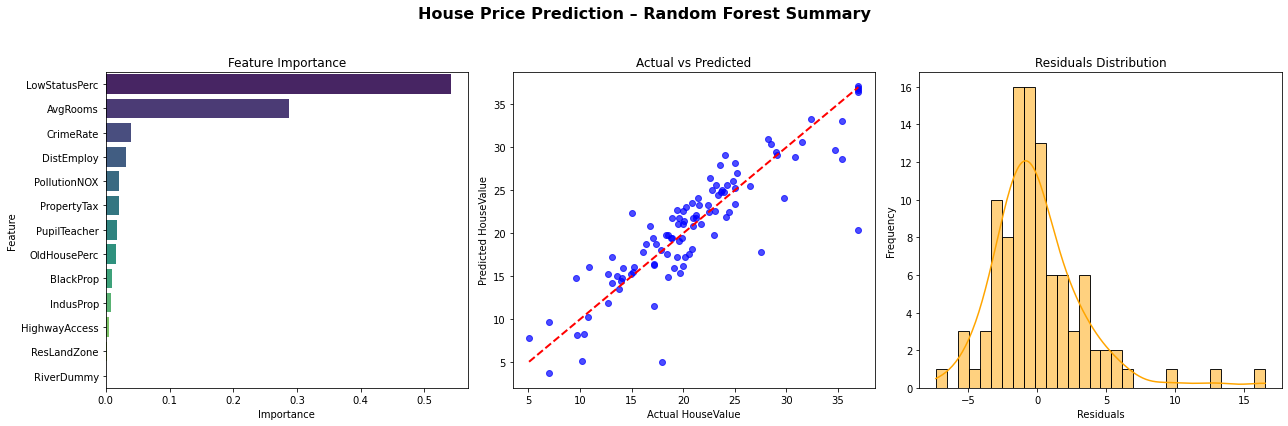

In [44]:
plt.figure(figsize=(18,6))

# 1️⃣ Feature Importance (Left)
plt.subplot(1,3,1)
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

# 2️⃣ Actual vs Predicted (Middle)
plt.subplot(1,3,2)
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual HouseValue')
plt.ylabel('Predicted HouseValue')
plt.title('Actual vs Predicted')

# 3️⃣ Residuals Distribution (Right)
plt.subplot(1,3,3)
residuals = y_test - y_pred
sns.histplot(residuals, bins=30, kde=True, color='orange')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')

plt.suptitle('House Price Prediction – Random Forest Summary', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


House Price Prediction – Project Overview

This project predicts median house prices in the Boston area using socio-economic, structural, and geographic features. The dataset was cleaned, outliers were handled, and no missing values were found. A baseline Linear Regression model achieved R² ≈ 0.76, while a Random Forest Regressor improved performance to R² ≈ 0.88 with RMSE ≈ 2.44. Feature importance analysis showed that socio-economic status (LowStatusPerc) and house size (AvgRooms) are the most influential factors. Residuals and predicted vs actual plots confirm the model’s accuracy and unbiased predictions. The Random Forest model is robust and ready for practical prediction and analysis tasks.